<a href="https://colab.research.google.com/github/astaraniwili/myproject/blob/master/Tugasakhir_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Referensi: 

Kaggle: https://www.kaggle.com/bensonruan/rock-paper-scissors-tf2-0-transfer-learning

Forum: https://www.dicoding.com/academies/184/discussions/51999

Pada referensi ini membuat model, visualisasi model dan menampilkan gambar pada data rock paper scissors.

#Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import zipfile

##Download Data

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/sample_data/rockpaperscissors.zip

--2020-07-30 22:35:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/sample_data/rockpaperscissors.zip’

/content/sample_dat 100%[===================>] 307.92M  5.77MB/s    in 38s     

2020-07-30 22:36:09 (8.14 MB/s) - ‘/content/sample_data/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
pip install split_folders

##Ekstraksi File
Melakukan ekstraksi pada file zip

In [ ]:
local_zip = '/content/sample_data/rockpaperscissors.zip'
zip_refer = zipfile.ZipFile(local_zip, 'r')
zip_refer.extractall('/content/sample_data/learn_submission')
zip_refer.close()
os.listdir('/content/sample_data/learn_submission/rockpaperscissors')

['README_rpc-cv-images.txt', 'rock', 'paper', 'rps-cv-images', 'scissors']

In [ ]:
import split_folders
base_dir = '/content/sample_data/learn_submission/rockpaperscissors/rps-cv-images'
split_folders.ratio(base_dir, output = '/content/sample_data/learn_submission', seed=1337, ratio=(.6, .4))

train_dir = os.path.join('/content/sample_data/learn_submission', 'train')
val_dir = os.path.join('/content/sample_data/learn_submission', 'val')

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)


print('total rock images:', len(rock_files))
print('total paper images:', len(paper_files))
print('total scissors images:', len(scissors_files))

Copying files: 2188 files [00:00, 2246.56 files/s]

total rock images: 726
total paper images: 712
total scissors images: 750


Menampilkan Gambar pada Data Rock Paper Scissors

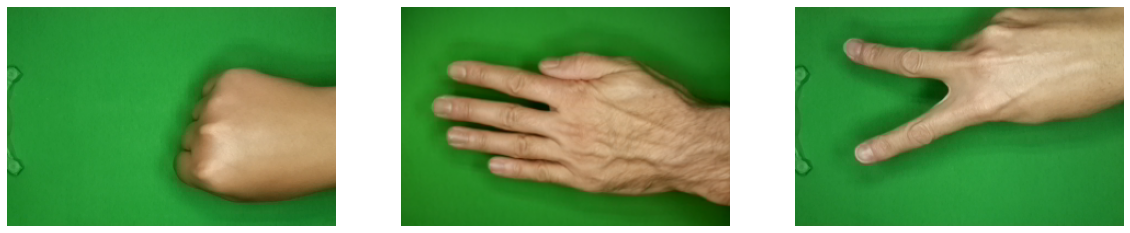

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage

pic_index = 10

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-1:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-1:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-1:pic_index]]

f, axarr = plt.subplots(1,3, figsize=(20,20))
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimage.imread(img_path)
    axarr[i].imshow(img)
    axarr[i].axis('Off')
plt.show()

Membagi direktori rock, paper, dan scissors menjadi data train dan validasi data

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(rock_files, test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(paper_files, test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(scissors_files, test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

##Augmentasi Gambar

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range= 0.2,
                    fill_mode ='nearest',
                    validation_split=0.4
)
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data train
        target_size=(150, 150),  # mengubah resolusi gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical') # klasifikasi pada data ada 3 kelas sehingga menggunakan class_mode = 'categorical' 
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, # direktori validasi data
        target_size=(150, 150), # mengubah resolusi gambar menjadi 150x150 piksel
        batch_size=32, 
        class_mode='categorical') # klasifikasi pada data ada 3 kelas sehingga menggunakan class_mode = 'categorical'

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


##Membuat Model dengan Arsitektur CNN


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #menggunakan activation softmax bukan sigmoid
])

##Menampilkan Model dan Akurasi Model

In [ ]:
model.summary()
#menggunakan adam sebagai optimizer
#pilihan optimizer bisa juga diganti dengan 'rmsprop' atau 'SGD'
#menggunakan loss fungsi = 'categorical_crossentropy' karena kelas klasifikasi lebih dari 2

model.compile(loss = 'categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

model_history = model.fit(train_generator, epochs=20, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rockpaperscissors.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

##Plot Model

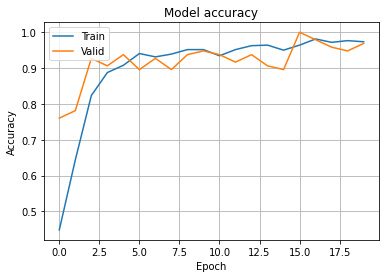

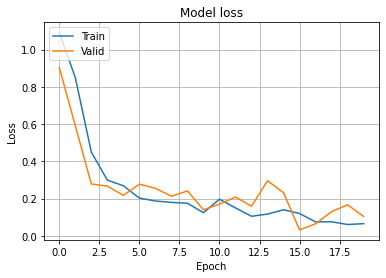

In [ ]:
# Plot dari data training & validation nilai Akurasi
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
plt.show()

# Plot dari data training & validation nilai loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
plt.show()

##Hasil Memprediksi Gambar


Saving 20200729_095328.png to 20200729_095328.png
20200729_095328.png
Kertas
                           
Gambar tersebut masuk kelas [[1. 0. 0.]]


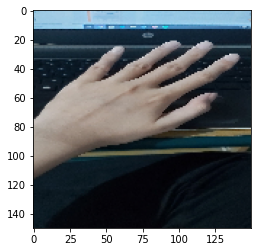

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')

# Jika classes bernilai [[ 1. 0. 0. ]], maka gambar diprediksi masuk kelas paper / kertas
# Jika classes bernilai [[ 0. 1. 0. ]], maka gambar diprediksi masuk kelas rock / batu 
# Jika classes bernilai [[ 0. 0. 1. ]], maka gambar diprediksi masuk kelas scissors / gunting  
  print('                           ')
  print('Gambar tersebut masuk kelas',classes)